In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def hw(Y, alpha_h, alpha_b):
    n = len(Y)
    result = np.zeros((n, ))
    result[0] = float(Y[0])
    beta = np.zeros((n, ))
    beta[0] = Y[1] - Y[0]
    for i in range(1, n):
        result[i] = ((1 - alpha_h) * (result[i-1] + beta[i - 1]) + (alpha_h * Y[i]))
        beta[i] = ((1 - alpha_b) * beta[i-1] + alpha_b * (result[i] - result[i-1]))
    return result, beta[-1]

In [3]:

def hw_pred(Y, beta_0, result_0, alpha_h, alpha_b, m = 20):
    result = [result_0]
    beta = [beta_0]
    y_pred = [result_0 + beta_0]
    for i in range(1, m):
        result.append(((1 - alpha_h) * (result[i-1] + beta[i - 1]) + (alpha_h * Y[i])))
        beta.append(((1 - alpha_b) * beta[i-1] + alpha_b * (result[i] - result[i-1])))
        y_pred.append(result[i] + beta[i])
    return y_pred


In [4]:
def plotHWSmoothing(series, n=20, m = 20):
    train, test = series[:-n], series[len(series)-n:]
    result, beta_0 = hw(train, 0.9, 0.9)
    plt.figure(figsize=(12,6))
    plt.plot(result, label='Train')
    test = hw_pred(test, beta_0, result[-1], 0.9, 0.9)
    plt.plot(np.arange(len(result), len(result) + m), test, label='Test')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


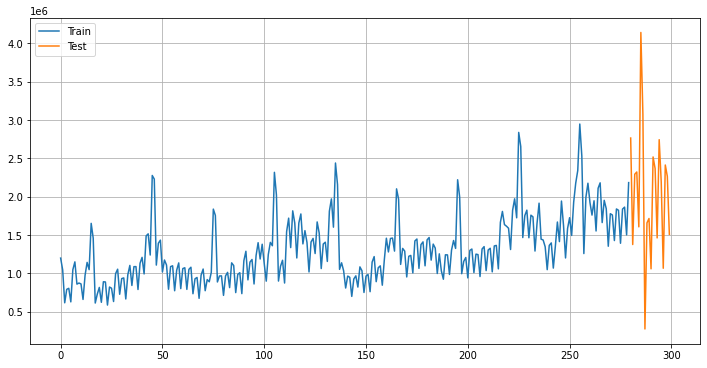

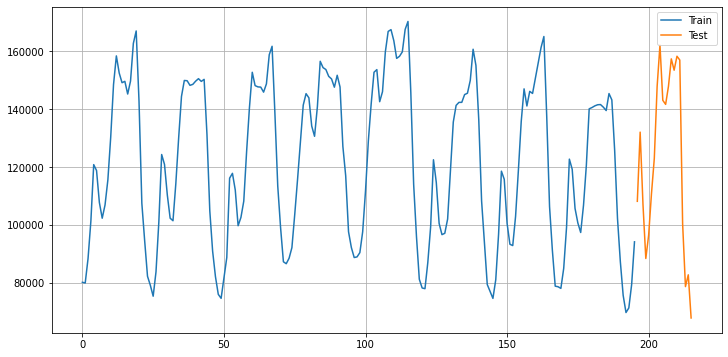

In [5]:

ads = pd.read_csv('https://bit.ly/2l9BdhA', index_col=['Time'], parse_dates=['Time'])
cur = pd.read_csv('https://bit.ly/2lLao3B', index_col=['Time'], parse_dates=['Time'])
plotHWSmoothing(cur.GEMS_GEMS_SPENT)
plotHWSmoothing(ads.Ads)
